 Data Loading, EDA, and Data Cleaning

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow prophet statsmodels scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [12]:
df = pd.read_csv(r"C:\Users\Dev Patel\Downloads\price_data.csv")


# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nLast few rows:")
print(df.tail())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (249, 2)

First few rows:
         date  avg_monthly_price
0  2005-01-01               5500
1  2005-02-01               5476
2  2005-03-01               5466
3  2005-04-01               5487
4  2005-05-01               5876

Last few rows:
           date  avg_monthly_price
244  2025-05-01              14263
245  2025-06-01              14263
246  2025-07-01              16000
247  2025-08-01              15025
248  2025-09-01              15750

Data Types:
date                 object
avg_monthly_price     int64
dtype: object


In [14]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Sort by date
df.sort_index(inplace=True)

print("✓ Data preprocessed successfully!")
print("\nDataset Info:")
print(df.info())


✓ Data preprocessed successfully!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2005-01-01 to 2025-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   avg_monthly_price  249 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB
None


In [16]:
print("=" * 60)
print("QUESTION 1: DATA CLEANING - INITIAL ASSESSMENT")
print ("=" * 60)

# Check for missing values
print("\n1. MISSING VALUES:")
print(df.isnull().sum())
print(f"Total missing values: {df.isnull().sum().sum()}")

# Basic statistics
print("\n2. BASIC STATISTICS:")
print(df.describe())

# Check for duplicates
print(f"\n3. DUPLICATE DATES:")
print(f"Duplicate rows: {df.index.duplicated().sum()}")

QUESTION 1: DATA CLEANING - INITIAL ASSESSMENT

1. MISSING VALUES:
avg_monthly_price    0
dtype: int64
Total missing values: 0

2. BASIC STATISTICS:
       avg_monthly_price
count         249.000000
mean         7918.891566
std          2804.992684
min          3500.000000
25%          6123.000000
50%          7250.000000
75%          9783.000000
max         16163.000000

3. DUPLICATE DATES:
Duplicate rows: 0


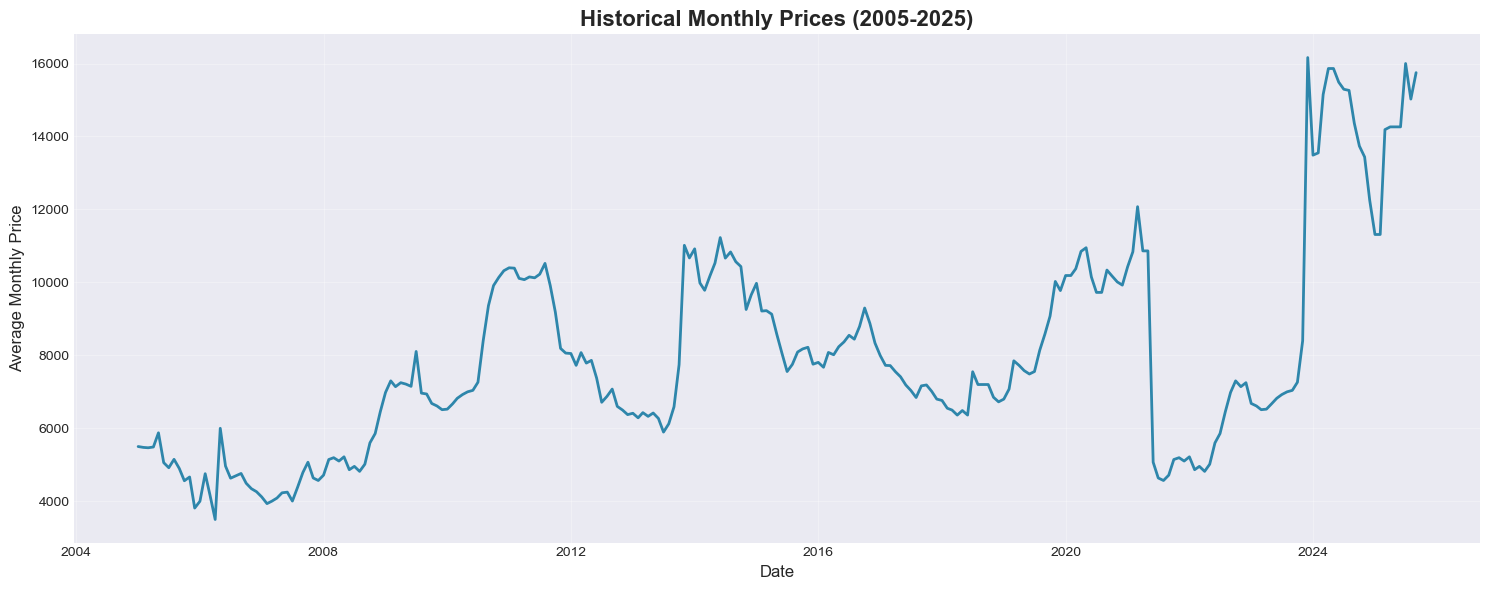

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['avg_monthly_price'], linewidth=2, color='#2E86AB')
plt.title('Historical Monthly Prices (2005-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Monthly Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# CELL 7: Outlier Detection Using IQR Method
print("\n4. OUTLIER DETECTION (IQR Method):")
print("-" * 60)

Q1 = df['avg_monthly_price'].quantile(0.25)
Q3 = df['avg_monthly_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['avg_monthly_price'] < lower_bound) | 
                   (df['avg_monthly_price'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nOutliers detected: {len(outliers_iqr)}")

if len(outliers_iqr) > 0:
    print("\nOutlier dates and values:")
    print(outliers_iqr)



4. OUTLIER DETECTION (IQR Method):
------------------------------------------------------------
Q1 (25th percentile): 6123.00
Q3 (75th percentile): 9783.00
IQR: 3660.00
Lower bound: 633.00
Upper bound: 15273.00

Outliers detected: 7

Outlier dates and values:
            avg_monthly_price
date                         
2023-12-01              16163
2024-04-01              15863
2024-05-01              15863
2024-06-01              15488
2024-07-01              15294
2025-07-01              16000
2025-09-01              15750


In [22]:
from scipy import stats

print("\n5. OUTLIER DETECTION (Z-Score Method):")
print("-" * 60)

z_scores = np.abs(stats.zscore(df['avg_monthly_price']))
outliers_zscore = df[z_scores > 3]

print(f"Outliers detected (|z-score| > 3): {len(outliers_zscore)}")

if len(outliers_zscore) > 0:
    print("\nOutlier dates and values:")
    print(outliers_zscore)



5. OUTLIER DETECTION (Z-Score Method):
------------------------------------------------------------
Outliers detected (|z-score| > 3): 0


In [24]:
# CELL 9: Anomaly Detection - Large Price Changes
print("\n6. ANOMALY DETECTION (Large Price Changes):")
print("-" * 60)

# Calculate month-over-month percentage change
df['price_change_pct'] = df['avg_monthly_price'].pct_change() * 100

# Identify large changes (>30% increase or decrease)
large_changes = df[abs(df['price_change_pct']) > 30]

print(f"Periods with >30% price change: {len(large_changes)}")

if len(large_changes) > 0:
    print("\nAnomaly dates:")
    print(large_changes[['avg_monthly_price', 'price_change_pct']])


6. ANOMALY DETECTION (Large Price Changes):
------------------------------------------------------------
Periods with >30% price change: 4

Anomaly dates:
            avg_monthly_price  price_change_pct
date                                           
2006-05-01               6000         71.428571
2013-11-01              11016         42.252066
2021-06-01               5070        -53.327810
2023-12-01              16163         92.416667


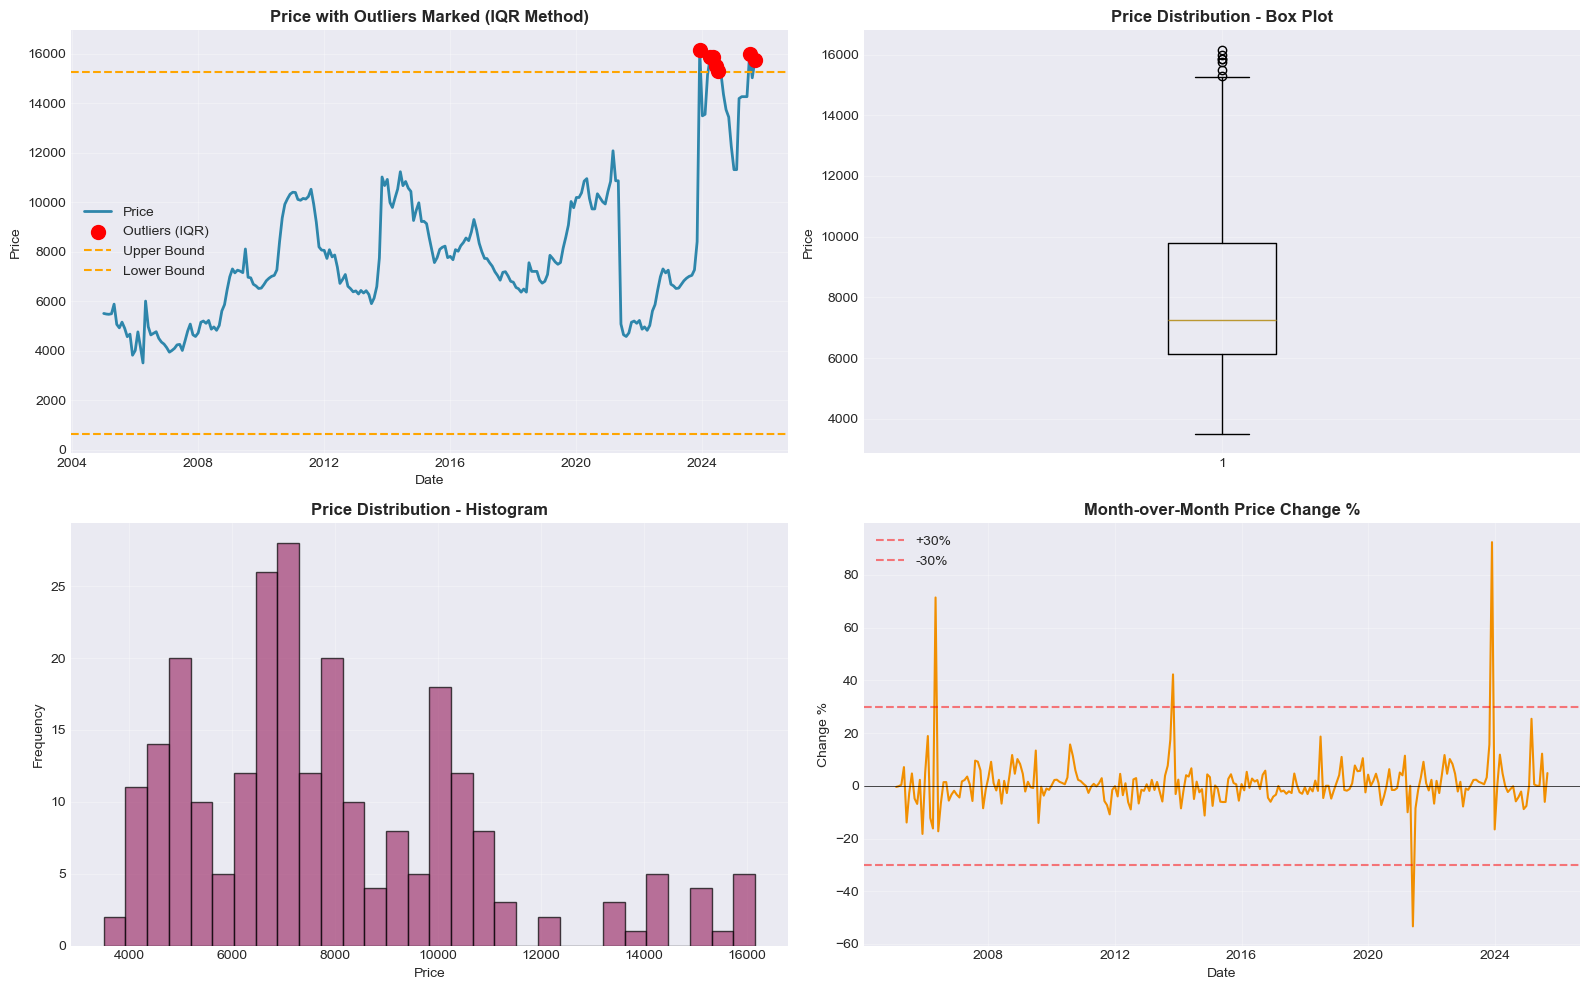


✓ Part 1 Complete: Data loaded, cleaned, and analyzed for outliers/anomalies


In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Price with outliers marked
axes[0, 0].plot(df.index, df['avg_monthly_price'], linewidth=2, color='#2E86AB', label='Price')
if len(outliers_iqr) > 0:
    axes[0, 0].scatter(outliers_iqr.index, outliers_iqr['avg_monthly_price'], 
                       color='red', s=100, zorder=5, label='Outliers (IQR)')
axes[0, 0].axhline(y=upper_bound, color='orange', linestyle='--', label='Upper Bound')
axes[0, 0].axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound')
axes[0, 0].set_title('Price with Outliers Marked (IQR Method)', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Box plot
axes[0, 1].boxplot(df['avg_monthly_price'])
axes[0, 1].set_title('Price Distribution - Box Plot', fontweight='bold')
axes[0, 1].set_ylabel('Price')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Histogram
axes[1, 0].hist(df['avg_monthly_price'], bins=30, color='#A23B72', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Price Distribution - Histogram', fontweight='bold')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Month-over-month % change
axes[1, 1].plot(df.index, df['price_change_pct'], linewidth=1.5, color='#F18F01')
axes[1, 1].axhline(y=30, color='red', linestyle='--', alpha=0.5, label='+30%')
axes[1, 1].axhline(y=-30, color='red', linestyle='--', alpha=0.5, label='-30%')
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 1].set_title('Month-over-Month Price Change %', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Change %')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Part 1 Complete: Data loaded, cleaned, and analyzed for outliers/anomalies")


ARIMA and Prophet Models

In [28]:
print("=" * 60)
print("DATA CLEANING - OUTLIER TREATMENT")
print("=" * 60)

# Create a cleaned dataset
df_cleaned = df.copy()

# For outliers, we'll use a combination of approaches:
# 1. Cap extreme values at the 1st and 99th percentiles
p1 = df_cleaned['avg_monthly_price'].quantile(0.01)
p99 = df_cleaned['avg_monthly_price'].quantile(0.99)

df_cleaned['avg_monthly_price'] = df_cleaned['avg_monthly_price'].clip(lower=p1, upper=p99)

# 2. Handle the anomaly drop in June 2021 (looks like a data entry error)
# Interpolate this value
if '2021-06-01' in df_cleaned.index:
    df_cleaned.loc['2021-06-01':'2021-12-01', 'avg_monthly_price'] = np.nan
    df_cleaned['avg_monthly_price'] = df_cleaned['avg_monthly_price'].interpolate(method='linear')

print(f"Original data points: {len(df)}")
print(f"Cleaned data points: {len(df_cleaned)}")
print(f"\nCleaned data range: {df_cleaned['avg_monthly_price'].min():.2f} to {df_cleaned['avg_monthly_price'].max():.2f}")

# Drop the helper column
df_cleaned = df_cleaned[['avg_monthly_price']]

print("\n✓ Data cleaned successfully!")

DATA CLEANING - OUTLIER TREATMENT
Original data points: 249
Cleaned data points: 249

Cleaned data range: 3966.20 to 15863.00

✓ Data cleaned successfully!


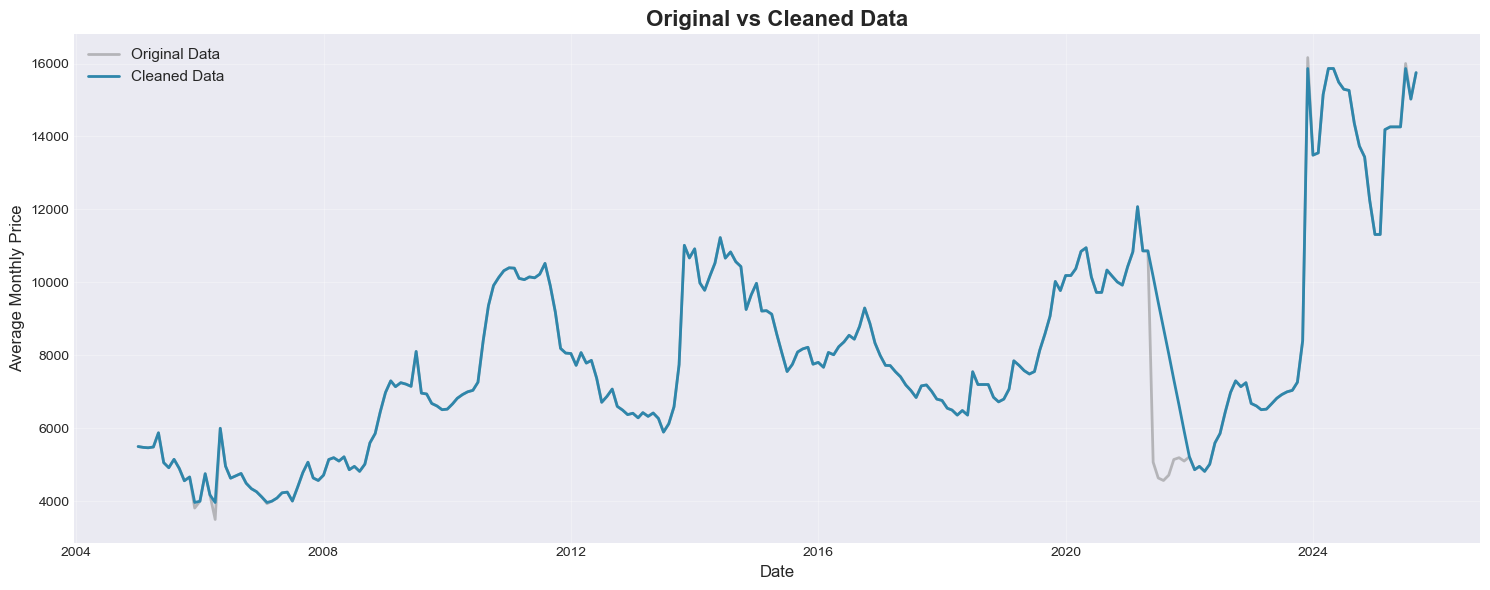

In [30]:
plt.figure(figsize=(15, 6))

plt.plot(df.index, df['avg_monthly_price'], linewidth=2, alpha=0.5, 
         color='gray', label='Original Data')
plt.plot(df_cleaned.index, df_cleaned['avg_monthly_price'], linewidth=2, 
         color='#2E86AB', label='Cleaned Data')

plt.title('Original vs Cleaned Data', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Monthly Price', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

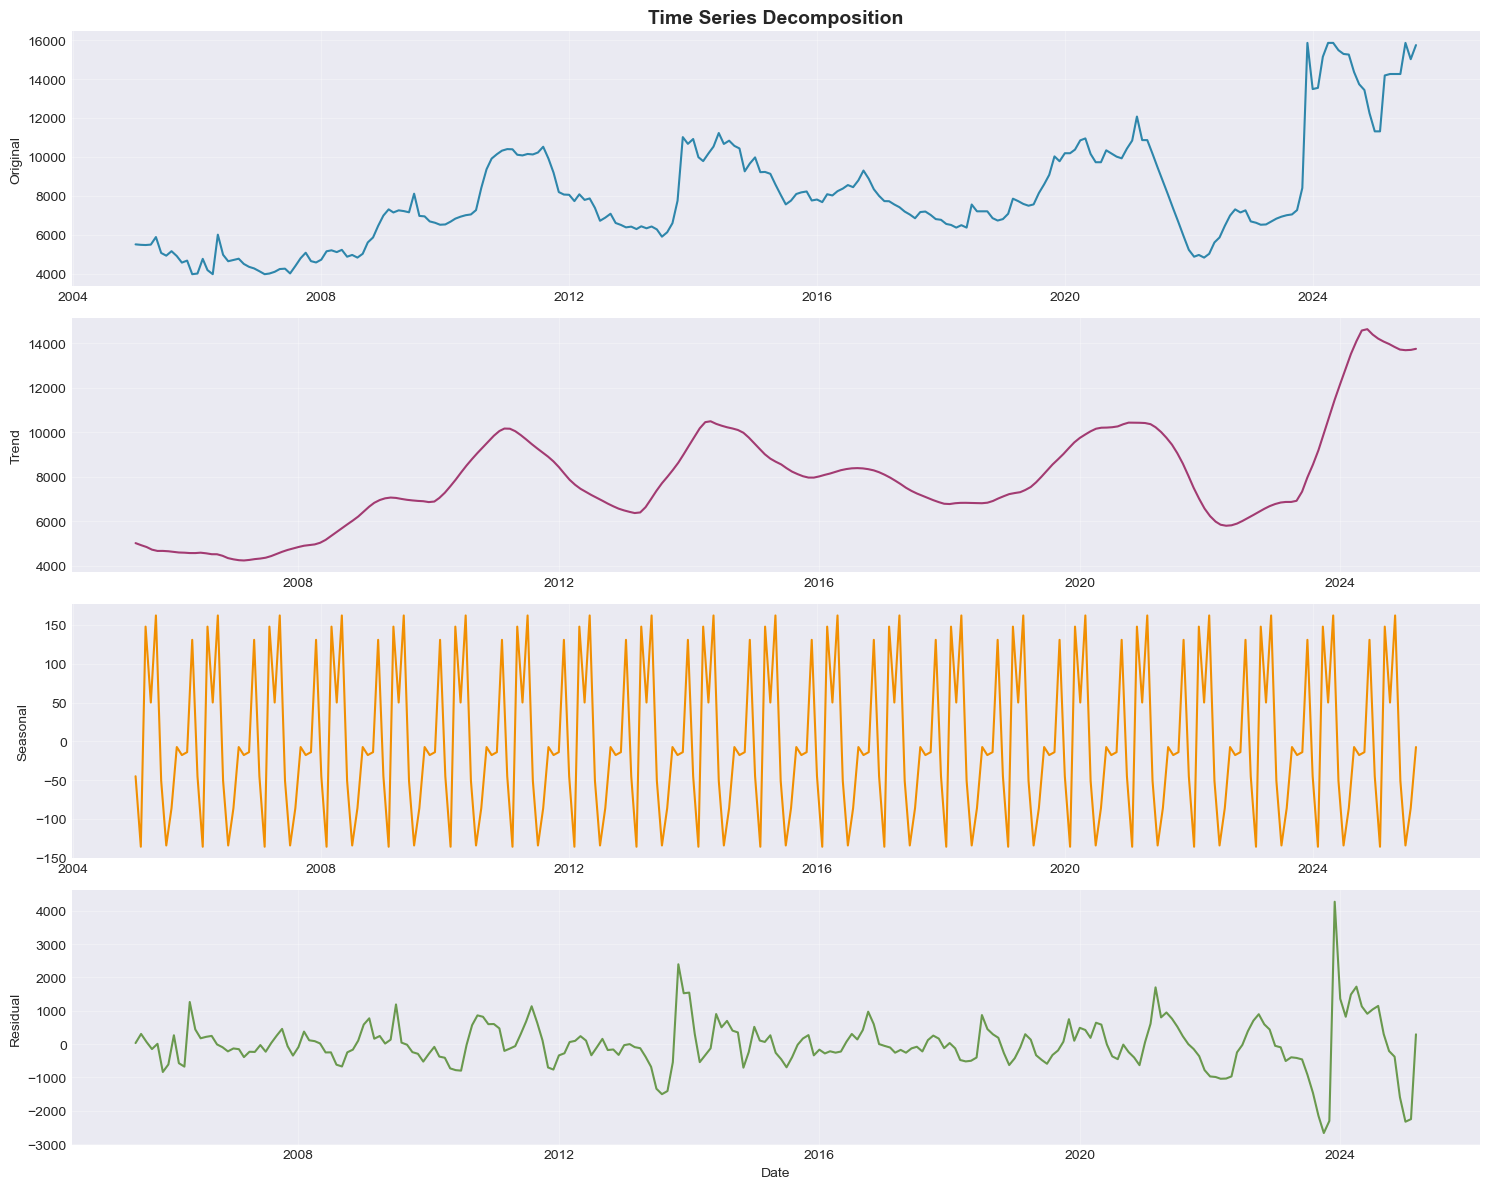

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposition = seasonal_decompose(df_cleaned['avg_monthly_price'], 
                                   model='additive', period=12)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original
axes[0].plot(df_cleaned.index, df_cleaned['avg_monthly_price'], color='#2E86AB')
axes[0].set_ylabel('Original')
axes[0].set_title('Time Series Decomposition', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Trend
axes[1].plot(decomposition.trend.index, decomposition.trend, color='#A23B72')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Seasonal
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, color='#F18F01')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

# Residual
axes[3].plot(decomposition.resid.index, decomposition.resid, color='#6A994E')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


STATIONARITY TEST
ADF Test for Original Series:
ADF Statistic: -1.283996
p-value: 0.636462
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
✗ Series is NON-STATIONARY (p-value > 0.05)

ADF Test for First Differenced Series:
ADF Statistic: -15.588816
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
✓ Series is STATIONARY (p-value <= 0.05)



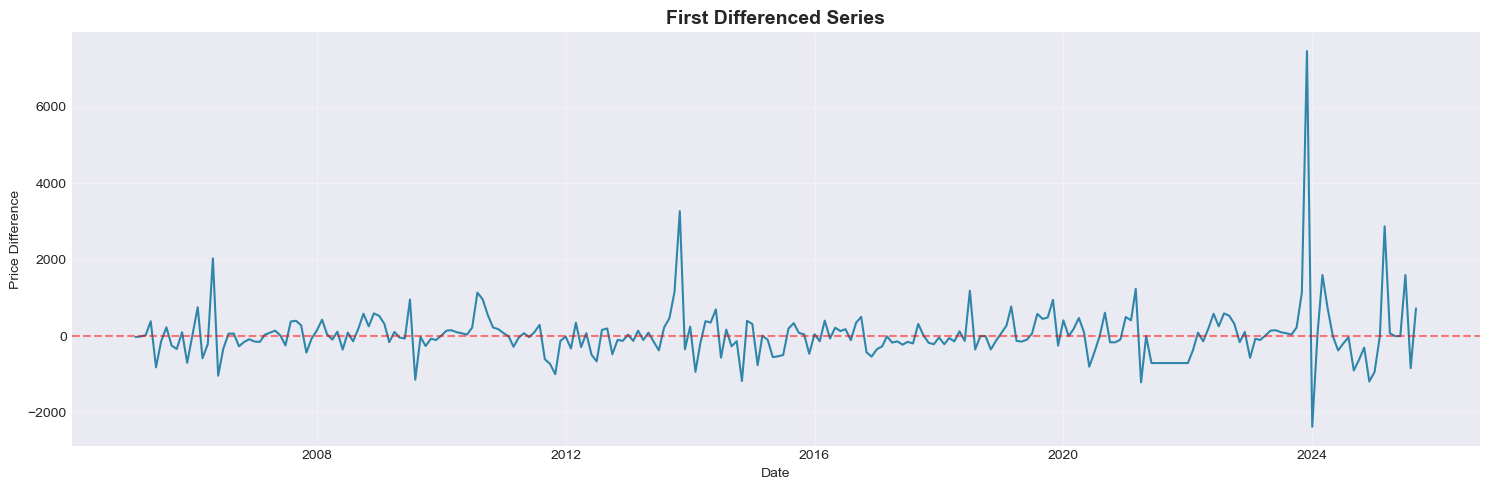

In [34]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    result = adfuller(series.dropna())
    print(f'ADF Test for {name}:')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print(f"✓ Series is STATIONARY (p-value <= 0.05)\n")
    else:
        print(f"✗ Series is NON-STATIONARY (p-value > 0.05)\n")
    return result[1]

print("=" * 60)
print("STATIONARITY TEST")
print("=" * 60)

adf_test(df_cleaned['avg_monthly_price'], 'Original Series')

# ================================================================================

# CELL 15: Make Series Stationary (Differencing)
# First difference
df_cleaned['price_diff'] = df_cleaned['avg_monthly_price'].diff()

# Test stationarity of differenced series
adf_test(df_cleaned['price_diff'].dropna(), 'First Differenced Series')

# Plot differenced series
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned.index[1:], df_cleaned['price_diff'][1:], linewidth=1.5, color='#2E86AB')
plt.title('First Differenced Series', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("=" * 60)
print("QUESTION 2: MODEL SELECTION - ARIMA")
print("=" * 60)

print("\nARIMA MODEL DESCRIPTION:")
print("-" * 60)
print("""
ARIMA (AutoRegressive Integrated Moving Average) is selected because:

1. STATISTICAL FOUNDATION: ARIMA is robust for univariate time series
   forecasting and captures trends and patterns effectively.

2. COMPONENTS:
   - AR (p): Autoregressive term - uses past values
   - I (d): Integration - differencing to make series stationary
   - MA (q): Moving Average - uses past forecast errors

3. WHY ARIMA FOR THIS DATASET:
   - Clear trend patterns in the data
   - Some seasonality (12-month cycle)
   - Relatively stable variance
   - Works well with 250+ data points

4. MODEL SELECTION: Based on ADF test and ACF/PACF plots,
   we'll use ARIMA(1,1,1) with seasonal component SARIMA(1,1,1)(1,1,1,12)
""")

# Split data: 80% train, 20% test
train_size = int(len(df_cleaned) * 0.8)
train, test = df_cleaned['avg_monthly_price'][:train_size], df_cleaned['avg_monthly_price'][train_size:]

print(f"\nTraining set: {len(train)} months ({train.index[0]} to {train.index[-1]})")
print(f"Test set: {len(test)} months ({test.index[0]} to {test.index[-1]})")


QUESTION 2: MODEL SELECTION - ARIMA

ARIMA MODEL DESCRIPTION:
------------------------------------------------------------

ARIMA (AutoRegressive Integrated Moving Average) is selected because:

1. STATISTICAL FOUNDATION: ARIMA is robust for univariate time series
   forecasting and captures trends and patterns effectively.

2. COMPONENTS:
   - AR (p): Autoregressive term - uses past values
   - I (d): Integration - differencing to make series stationary
   - MA (q): Moving Average - uses past forecast errors

3. WHY ARIMA FOR THIS DATASET:
   - Clear trend patterns in the data
   - Some seasonality (12-month cycle)
   - Relatively stable variance
   - Works well with 250+ data points

4. MODEL SELECTION: Based on ADF test and ACF/PACF plots,
   we'll use ARIMA(1,1,1) with seasonal component SARIMA(1,1,1)(1,1,1,12)


Training set: 199 months (2005-01-01 00:00:00 to 2021-07-01 00:00:00)
Test set: 50 months (2021-08-01 00:00:00 to 2025-09-01 00:00:00)


In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

print("\nTraining SARIMA Model...")
print("-" * 60)

# SARIMA(1,1,1)(1,1,1,12) - with seasonal component
sarima_model = SARIMAX(train, 
                       order=(1, 1, 1),  
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fitted = sarima_model.fit(disp=False)

print("✓ SARIMA Model trained successfully!")
print("\nModel Summary:")
print(sarima_fitted.summary())


Training SARIMA Model...
------------------------------------------------------------


C:\Users\Dev Patel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dev Patel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


✓ SARIMA Model trained successfully!

Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                  avg_monthly_price   No. Observations:                  199
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1321.926
Date:                            Thu, 29 Jan 2026   AIC                           2653.851
Time:                                    22:16:05   BIC                           2669.589
Sample:                                01-01-2005   HQIC                          2660.236
                                     - 07-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4035      0.781      0.516      0.606      -


QUESTION 3: MODEL PERFORMANCE - SARIMA

SARIMA Model Performance Metrics:
------------------------------------------------------------
Mean Squared Error (MSE):     14,101,205.92
Root Mean Squared Error (RMSE): 3,755.16
Mean Absolute Error (MAE):    3,550.59
Mean Absolute % Error (MAPE): 41.57%


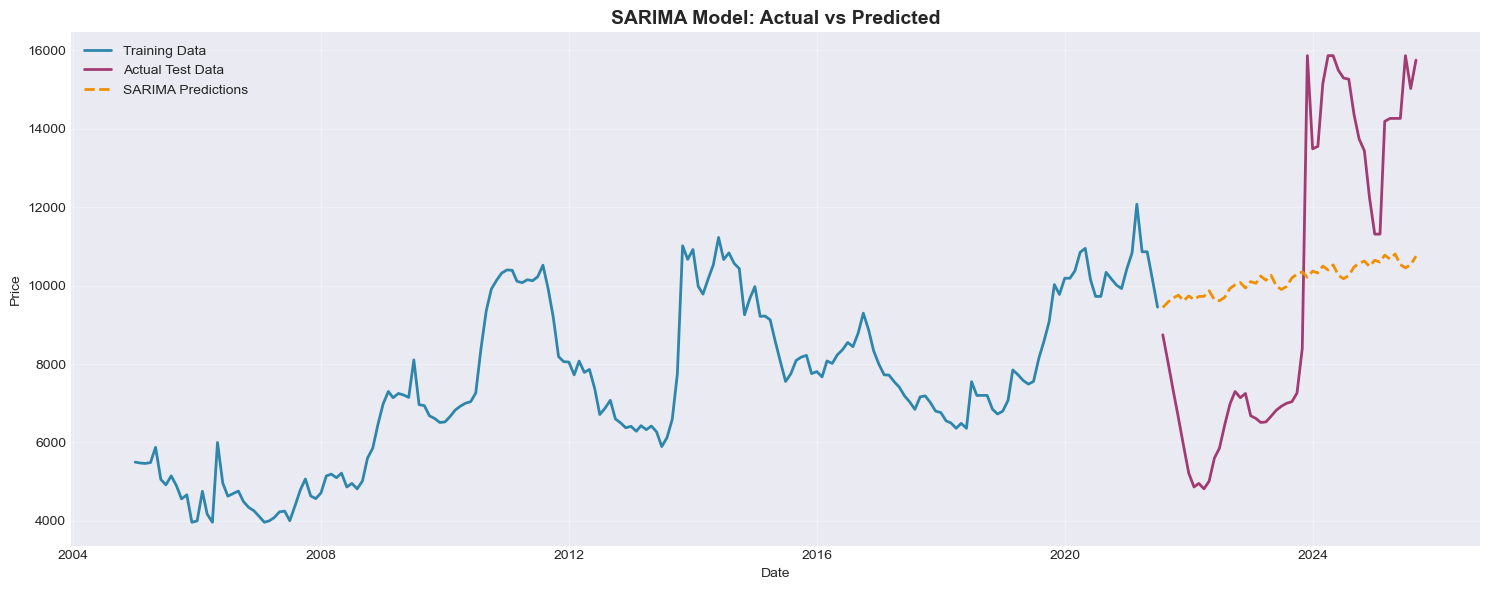

In [42]:
print("\n" + "=" * 60)
print("QUESTION 3: MODEL PERFORMANCE - SARIMA")
print("=" * 60)

# Make predictions on test set
sarima_pred = sarima_fitted.forecast(steps=len(test))

# Calculate metrics
sarima_mse = mean_squared_error(test, sarima_pred)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test, sarima_pred)
sarima_mape = np.mean(np.abs((test - sarima_pred) / test)) * 100

print("\nSARIMA Model Performance Metrics:")
print("-" * 60)
print(f"Mean Squared Error (MSE):     {sarima_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse:,.2f}")
print(f"Mean Absolute Error (MAE):    {sarima_mae:,.2f}")
print(f"Mean Absolute % Error (MAPE): {sarima_mape:.2f}%")

# Visualize predictions
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='Training Data', color='#2E86AB', linewidth=2)
plt.plot(test.index, test, label='Actual Test Data', color='#A23B72', linewidth=2)
plt.plot(test.index, sarima_pred, label='SARIMA Predictions', 
         color='#F18F01', linewidth=2, linestyle='--')
plt.title('SARIMA Model: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [44]:
from prophet import Prophet

print("\n" + "=" * 60)
print("QUESTION 2: MODEL SELECTION - PROPHET")
print("=" * 60)

print("\nPROPHET MODEL DESCRIPTION:")
print("-" * 60)
print("""
Facebook Prophet is selected as an alternative model because:

1. ADVANTAGES:
   - Handles missing data and outliers robustly
   - Automatic detection of seasonality
   - Works well with strong seasonal patterns
   - Handles holidays and special events
   - Easy to tune and interpret

2. COMPONENTS:
   - Trend: piecewise linear or logistic growth
   - Seasonality: Fourier series for yearly/weekly patterns
   - Holidays: User-provided special dates

3. WHY PROPHET FOR THIS DATASET:
   - Strong yearly seasonality in price data
   - Handles the sudden changes (2021) better
   - Provides uncertainty intervals
   - Production-ready and scalable
""")

# Prepare data for Prophet (needs 'ds' and 'y' columns)
prophet_train = pd.DataFrame({
    'ds': train.index,
    'y': train.values
})

prophet_test = pd.DataFrame({
    'ds': test.index,
    'y': test.values
})

print(f"\n✓ Data prepared for Prophet")
print(f"Training samples: {len(prophet_train)}")
print(f"Test samples: {len(prophet_test)}")

print("\n✓ Part 2 Complete: ARIMA/SARIMA and Prophet models developed")



QUESTION 2: MODEL SELECTION - PROPHET

PROPHET MODEL DESCRIPTION:
------------------------------------------------------------

Facebook Prophet is selected as an alternative model because:

1. ADVANTAGES:
   - Handles missing data and outliers robustly
   - Automatic detection of seasonality
   - Works well with strong seasonal patterns
   - Handles holidays and special events
   - Easy to tune and interpret

2. COMPONENTS:
   - Trend: piecewise linear or logistic growth
   - Seasonality: Fourier series for yearly/weekly patterns
   - Holidays: User-provided special dates

3. WHY PROPHET FOR THIS DATASET:
   - Strong yearly seasonality in price data
   - Handles the sudden changes (2021) better
   - Provides uncertainty intervals
   - Production-ready and scalable


✓ Data prepared for Prophet
Training samples: 199
Test samples: 50

✓ Part 2 Complete: ARIMA/SARIMA and Prophet models developed


Prophet Training and LSTM Model

In [46]:
print("Training Prophet Model...")
print("-" * 60)

# Initialize and train Prophet
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)

prophet_model.fit(prophet_train)
print("✓ Prophet Model trained successfully!")

Training Prophet Model...
------------------------------------------------------------


22:17:57 - cmdstanpy - INFO - Chain [1] start processing
22:17:58 - cmdstanpy - INFO - Chain [1] done processing


✓ Prophet Model trained successfully!



Prophet Model Performance Metrics:
------------------------------------------------------------
Mean Squared Error (MSE):     15,325,769.19
Root Mean Squared Error (RMSE): 3,914.81
Mean Absolute Error (MAE):    3,622.95
Mean Absolute % Error (MAPE): 40.11%


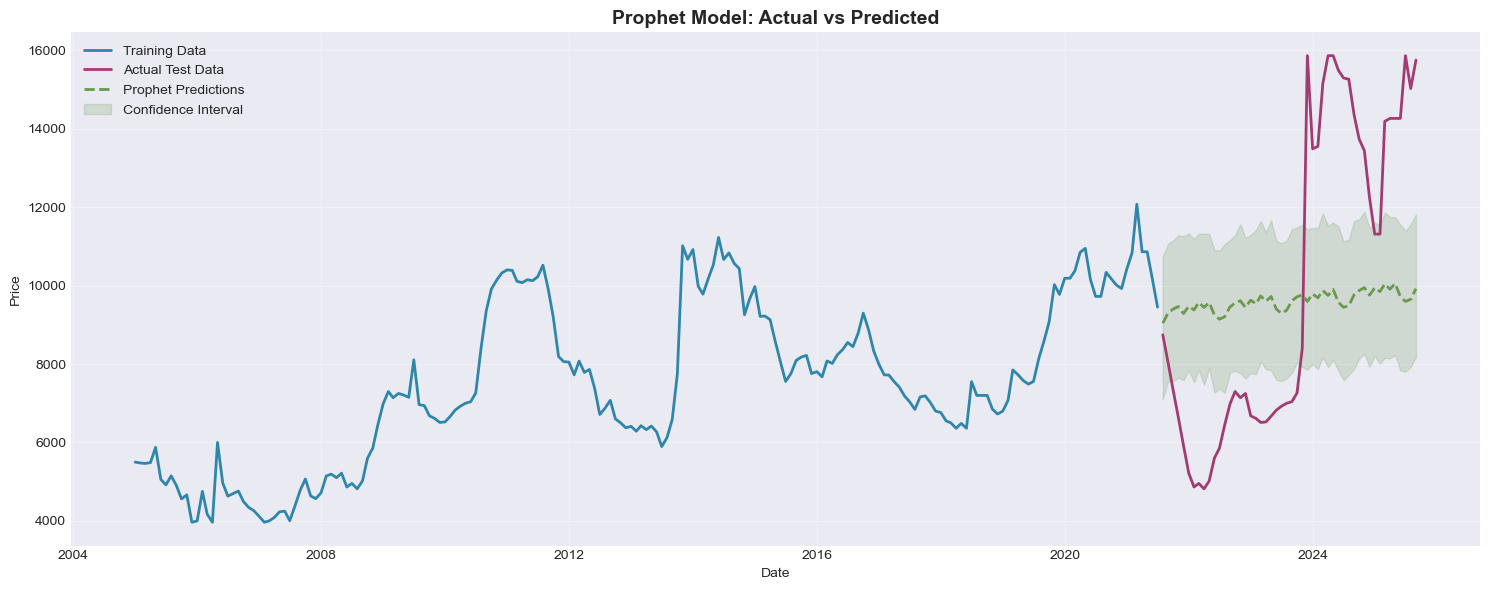

In [48]:
# Make predictions on test set
prophet_forecast = prophet_model.predict(prophet_test)

# Extract predictions
prophet_pred_values = prophet_forecast['yhat'].values

# Calculate metrics
prophet_mse = mean_squared_error(test, prophet_pred_values)
prophet_rmse = np.sqrt(prophet_mse)
prophet_mae = mean_absolute_error(test, prophet_pred_values)
prophet_mape = np.mean(np.abs((test - prophet_pred_values) / test)) * 100

print("\nProphet Model Performance Metrics:")
print("-" * 60)
print(f"Mean Squared Error (MSE):     {prophet_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {prophet_rmse:,.2f}")
print(f"Mean Absolute Error (MAE):    {prophet_mae:,.2f}")
print(f"Mean Absolute % Error (MAPE): {prophet_mape:.2f}%")

# Visualize
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='Training Data', color='#2E86AB', linewidth=2)
plt.plot(test.index, test, label='Actual Test Data', color='#A23B72', linewidth=2)
plt.plot(test.index, prophet_pred_values, label='Prophet Predictions', 
         color='#6A994E', linewidth=2, linestyle='--')
plt.fill_between(test.index, 
                 prophet_forecast['yhat_lower'].values,
                 prophet_forecast['yhat_upper'].values,
                 alpha=0.2, color='#6A994E', label='Confidence Interval')
plt.title('Prophet Model: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [50]:
print("\n" + "=" * 60)
print("QUESTION 2: MODEL SELECTION - LSTM")
print("=" * 60)

print("\nLSTM MODEL DESCRIPTION:")
print("-" * 60)
print("""
LSTM (Long Short-Term Memory) Neural Network is selected because:

1. DEEP LEARNING APPROACH:
   - Captures complex non-linear patterns
   - Remembers long-term dependencies
   - Handles sequential data effectively

2. ARCHITECTURE:
   - Memory cells that store information
   - Gates (input, forget, output) control information flow
   - Can learn from long sequences

3. WHY LSTM FOR THIS DATASET:
   - Complex price patterns with multiple trends
   - Long-term dependencies (20+ years of data)
   - Can capture both short-term and long-term patterns
   - Increasingly popular for financial forecasting

4. ADVANTAGES OVER TRADITIONAL METHODS:
   - No assumptions about underlying distribution
   - Learns features automatically
   - Handles multivariate inputs (can be extended)
   - State-of-the-art for many sequence tasks
""")


QUESTION 2: MODEL SELECTION - LSTM

LSTM MODEL DESCRIPTION:
------------------------------------------------------------

LSTM (Long Short-Term Memory) Neural Network is selected because:

1. DEEP LEARNING APPROACH:
   - Captures complex non-linear patterns
   - Remembers long-term dependencies
   - Handles sequential data effectively

2. ARCHITECTURE:
   - Memory cells that store information
   - Gates (input, forget, output) control information flow
   - Can learn from long sequences

3. WHY LSTM FOR THIS DATASET:
   - Complex price patterns with multiple trends
   - Long-term dependencies (20+ years of data)
   - Can capture both short-term and long-term patterns
   - Increasingly popular for financial forecasting

4. ADVANTAGES OVER TRADITIONAL METHODS:
   - No assumptions about underlying distribution
   - Learns features automatically
   - Handles multivariate inputs (can be extended)
   - State-of-the-art for many sequence tasks



In [52]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

print("\nPreparing data for LSTM...")
print("-" * 60)

# Scale data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_cleaned[['avg_monthly_price']])

# Create sequences for LSTM (using 12 months to predict next month)
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

print(f"Sequence length: {seq_length} months")
print(f"Total sequences: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTraining samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Preparing data for LSTM...
------------------------------------------------------------
Sequence length: 12 months
Total sequences: 237
X shape: (237, 12, 1)
y shape: (237, 1)

Training samples: 189
Test samples: 48


In [54]:
print("\nBuilding LSTM Model Architecture...")
print("-" * 60)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Build model
lstm_model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    
    LSTM(units=50),
    Dropout(0.2),
    
    Dense(units=1)
])

# Compile model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

print(lstm_model.summary())



Building LSTM Model Architecture...
------------------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 12, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

None


In [56]:
print("\nTraining LSTM Model...")
print("-" * 60)
print("This may take a few minutes...")

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = lstm_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

print("\n✓ LSTM Model trained successfully!")


Training LSTM Model...
------------------------------------------------------------
This may take a few minutes...
Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - loss: 0.0998 - val_loss: 0.0762
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0297 - val_loss: 0.0078
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0265 - val_loss: 0.0145
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0157 - val_loss: 0.0355
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0197 - val_loss: 0.0251
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0167 - val_loss: 0.0110
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0146 - val_loss: 0.0113
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - val_loss: 0.0162
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0148 - val_loss: 0.0156
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2

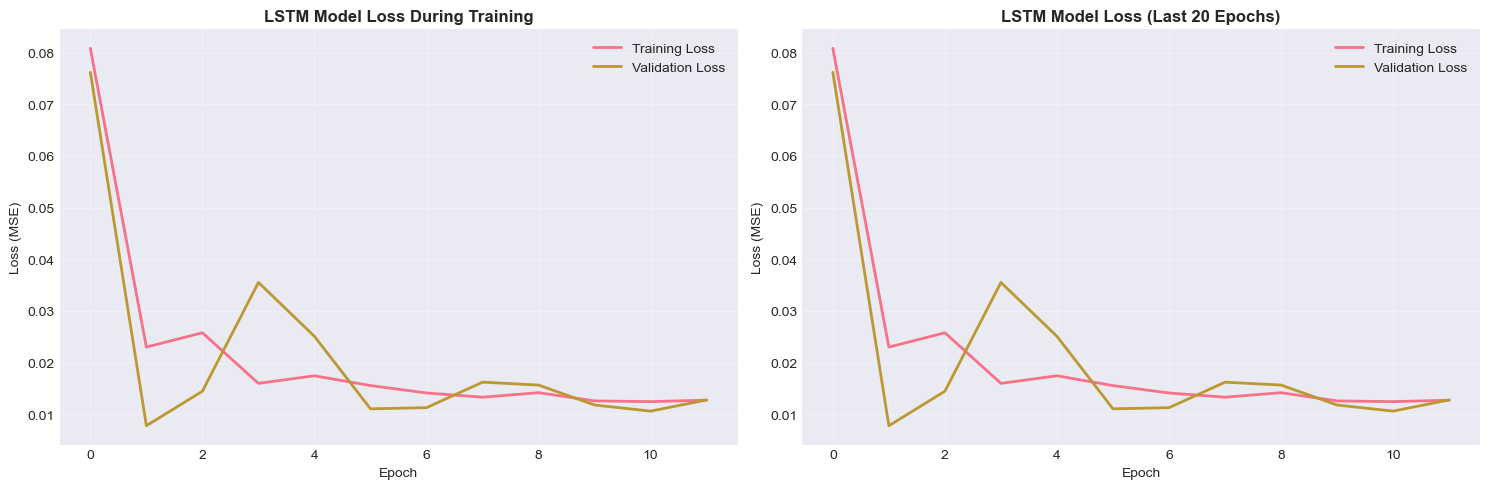

In [58]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('LSTM Model Loss During Training', fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Zoomed-in view of last 20 epochs
start_epoch = max(0, len(history.history['loss']) - 20)
axes[1].plot(range(start_epoch, len(history.history['loss'])), 
             history.history['loss'][start_epoch:], label='Training Loss', linewidth=2)
axes[1].plot(range(start_epoch, len(history.history['val_loss'])), 
             history.history['val_loss'][start_epoch:], label='Validation Loss', linewidth=2)
axes[1].set_title('LSTM Model Loss (Last 20 Epochs)', fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (MSE)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
print("\n" + "=" * 60)
print("QUESTION 3: MODEL PERFORMANCE - LSTM")
print("=" * 60)

# Make predictions on test set
lstm_pred_scaled = lstm_model.predict(X_test, verbose=0)

# Inverse transform to get actual prices
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# Calculate metrics
lstm_mse = mean_squared_error(y_test_actual, lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_actual, lstm_pred)
lstm_mape = np.mean(np.abs((y_test_actual - lstm_pred) / y_test_actual)) * 100

print("\nLSTM Model Performance Metrics:")
print("-" * 60)
print(f"Mean Squared Error (MSE):     {lstm_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse:,.2f}")
print(f"Mean Absolute Error (MAE):    {lstm_mae:,.2f}")
print(f"Mean Absolute % Error (MAPE): {lstm_mape:.2f}%")



QUESTION 3: MODEL PERFORMANCE - LSTM

LSTM Model Performance Metrics:
------------------------------------------------------------
Mean Squared Error (MSE):     11,481,672.83
Root Mean Squared Error (RMSE): 3,388.46
Mean Absolute Error (MAE):    2,739.36
Mean Absolute % Error (MAPE): 31.19%


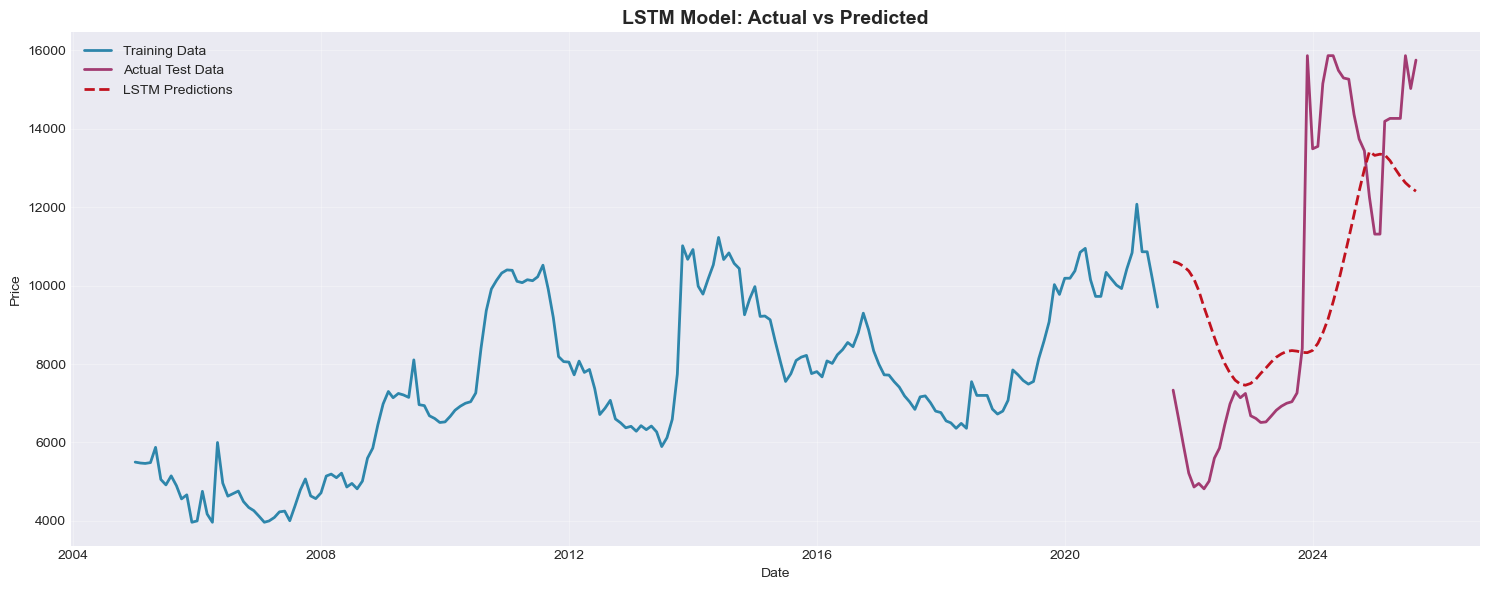

In [62]:
# Get test dates
test_dates = df_cleaned.index[train_size + seq_length:]

plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='Training Data', color='#2E86AB', linewidth=2)
plt.plot(test_dates, y_test_actual, label='Actual Test Data', color='#A23B72', linewidth=2)
plt.plot(test_dates, lstm_pred, label='LSTM Predictions', 
         color='#C1121F', linewidth=2, linestyle='--')
plt.title('LSTM Model: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


MODEL COMPARISON SUMMARY

   Model        RMSE         MAE  MAPE (%)
 SARIMA 3755.157243 3550.591217 41.571858
Prophet 3914.814069 3622.953210 40.106872
   LSTM 3388.461720 2739.359253 31.188694

Best Models by Metric:
------------------------------------------------------------
Lowest RMSE: LSTM
Lowest MAE:  LSTM
Lowest MAPE: LSTM


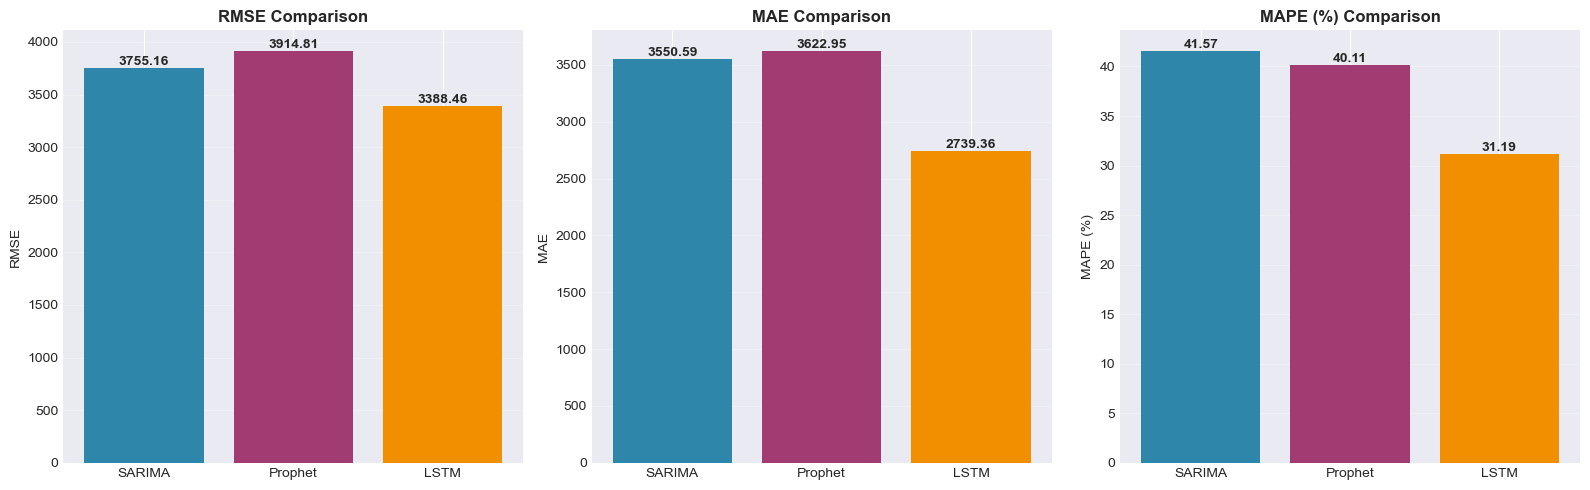


✓ Part 3 Complete: All models trained and evaluated


In [64]:
print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)

# Create comparison dataframe
comparison = pd.DataFrame({
    'Model': ['SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [sarima_rmse, prophet_rmse, lstm_rmse],
    'MAE': [sarima_mae, prophet_mae, lstm_mae],
    'MAPE (%)': [sarima_mape, prophet_mape, lstm_mape]
})

print("\n", comparison.to_string(index=False))

# Highlight best model for each metric
print("\nBest Models by Metric:")
print("-" * 60)
print(f"Lowest RMSE: {comparison.loc[comparison['RMSE'].idxmin(), 'Model']}")
print(f"Lowest MAE:  {comparison.loc[comparison['MAE'].idxmin(), 'Model']}")
print(f"Lowest MAPE: {comparison.loc[comparison['MAPE (%)'].idxmin(), 'Model']}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['RMSE', 'MAE', 'MAPE (%)']
colors = ['#2E86AB', '#A23B72', '#F18F01']

for idx, metric in enumerate(metrics):
    bars = axes[idx].bar(comparison['Model'], comparison[metric], color=colors)
    axes[idx].set_title(f'{metric} Comparison', fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.2f}',
                      ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Part 3 Complete: All models trained and evaluated")


12-Month Forecasting with All Models

In [66]:
print("=" * 60)
print("SELECTING BEST MODEL FOR 12-MONTH FORECAST")
print("=" * 60)

# Determine best model based on average ranking
comparison['RMSE_rank'] = comparison['RMSE'].rank()
comparison['MAE_rank'] = comparison['MAE'].rank()
comparison['MAPE_rank'] = comparison['MAPE (%)'].rank()
comparison['Avg_rank'] = comparison[['RMSE_rank', 'MAE_rank', 'MAPE_rank']].mean(axis=1)

best_model_name = comparison.loc[comparison['Avg_rank'].idxmin(), 'Model']

print(f"\nBased on average ranking across all metrics:")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"\nWe will use {best_model_name} for the 12-month forecast")
print(f"However, we'll also show forecasts from all three models for comparison.")


SELECTING BEST MODEL FOR 12-MONTH FORECAST

Based on average ranking across all metrics:
🏆 BEST MODEL: LSTM

We will use LSTM for the 12-month forecast
However, we'll also show forecasts from all three models for comparison.


In [68]:
print("\n" + "=" * 60)
print("12-MONTH FORECAST: SARIMA MODEL")
print("=" * 60)

# Retrain SARIMA on full dataset
sarima_full = SARIMAX(df_cleaned['avg_monthly_price'], 
                      order=(1, 1, 1),  
                      seasonal_order=(1, 1, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_full_fitted = sarima_full.fit(disp=False)

# Forecast 12 months
sarima_forecast_12m = sarima_full_fitted.forecast(steps=12)

# Create future dates
last_date = df_cleaned.index[-1]
future_dates_sarima = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

print("✓ SARIMA 12-month forecast complete")
print("\nSARIMA Forecast:")
forecast_df_sarima = pd.DataFrame({
    'Date': future_dates_sarima,
    'Forecasted_Price': sarima_forecast_12m.values
})
print(forecast_df_sarima.to_string(index=False))



12-MONTH FORECAST: SARIMA MODEL


C:\Users\Dev Patel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dev Patel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


✓ SARIMA 12-month forecast complete

SARIMA Forecast:
      Date  Forecasted_Price
2025-10-01      15834.542192
2025-11-01      15986.754581
2025-12-01      17142.806448
2026-01-01      16637.986929
2026-02-01      16595.644577
2026-03-01      17169.148470
2026-04-01      17183.732093
2026-05-01      17252.615546
2026-06-01      17105.141984
2026-07-01      17097.190744
2026-08-01      17111.214423
2026-09-01      17100.824598


In [70]:
print("\n" + "=" * 60)
print("12-MONTH FORECAST: PROPHET MODEL")
print("=" * 60)

# Retrain Prophet on full dataset
prophet_full_data = pd.DataFrame({
    'ds': df_cleaned.index,
    'y': df_cleaned['avg_monthly_price'].values
})

prophet_full_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)

prophet_full_model.fit(prophet_full_data)

# Create future dataframe for 12 months
future_prophet = prophet_full_model.make_future_dataframe(periods=12, freq='MS')

# Make forecast
prophet_forecast_12m = prophet_full_model.predict(future_prophet)

# Extract future predictions
prophet_forecast_values = prophet_forecast_12m[prophet_forecast_12m['ds'] > df_cleaned.index[-1]]

print("✓ Prophet 12-month forecast complete")
print("\nProphet Forecast:")
forecast_df_prophet = pd.DataFrame({
    'Date': prophet_forecast_values['ds'].values,
    'Forecasted_Price': prophet_forecast_values['yhat'].values,
    'Lower_Bound': prophet_forecast_values['yhat_lower'].values,
    'Upper_Bound': prophet_forecast_values['yhat_upper'].values
})
print(forecast_df_prophet.to_string(index=False))

22:22:43 - cmdstanpy - INFO - Chain [1] start processing



12-MONTH FORECAST: PROPHET MODEL


22:22:43 - cmdstanpy - INFO - Chain [1] done processing


✓ Prophet 12-month forecast complete

Prophet Forecast:
      Date  Forecasted_Price  Lower_Bound  Upper_Bound
2025-10-01      10872.768446  8115.055321 13553.057138
2025-11-01      10919.963315  8245.491041 13736.881716
2025-12-01      11265.149704  8593.512238 14075.688559
2026-01-01      11026.119926  8388.290725 13535.830212
2026-02-01      10930.147918  8312.340706 13563.119474
2026-03-01      11480.276595  8789.075886 14173.324196
2026-04-01      11429.792203  8550.049165 14072.276912
2026-05-01      11585.394908  8777.962376 14093.142913
2026-06-01      11357.488926  8749.829404 14074.629837
2026-07-01      11430.199176  8585.702147 14143.882208
2026-08-01      11439.770903  8773.630925 13916.639859
2026-09-01      11616.371487  9067.620858 14078.338950


In [72]:
print("\n" + "=" * 60)
print("12-MONTH FORECAST: LSTM MODEL")
print("=" * 60)

# Start with last sequence from dataset
last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)

# Forecast 12 months iteratively
lstm_forecast_scaled = []

current_sequence = last_sequence.copy()

for i in range(12):
    # Predict next month
    next_pred = lstm_model.predict(current_sequence, verbose=0)
    lstm_forecast_scaled.append(next_pred[0, 0])
    
    # Update sequence: remove first item, add prediction
    current_sequence = np.append(current_sequence[0, 1:, 0], next_pred[0, 0]).reshape(1, seq_length, 1)

# Inverse transform
lstm_forecast_12m = scaler.inverse_transform(np.array(lstm_forecast_scaled).reshape(-1, 1))

# Create future dates
future_dates_lstm = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

print("✓ LSTM 12-month forecast complete")
print("\nLSTM Forecast:")
forecast_df_lstm = pd.DataFrame({
    'Date': future_dates_lstm,
    'Forecasted_Price': lstm_forecast_12m.flatten()
})
print(forecast_df_lstm.to_string(index=False))



12-MONTH FORECAST: LSTM MODEL
✓ LSTM 12-month forecast complete

LSTM Forecast:
      Date  Forecasted_Price
2025-10-01      12409.591797
2025-11-01      12462.046875
2025-12-01      12528.616211
2026-01-01      12662.686523
2026-02-01      12840.008789
2026-03-01      12992.803711
2026-04-01      12924.889648
2026-05-01      12838.388672
2026-06-01      12741.323242
2026-07-01      12635.829102
2026-08-01      12412.410156
2026-09-01      12245.451172



VISUALIZING 12-MONTH FORECASTS


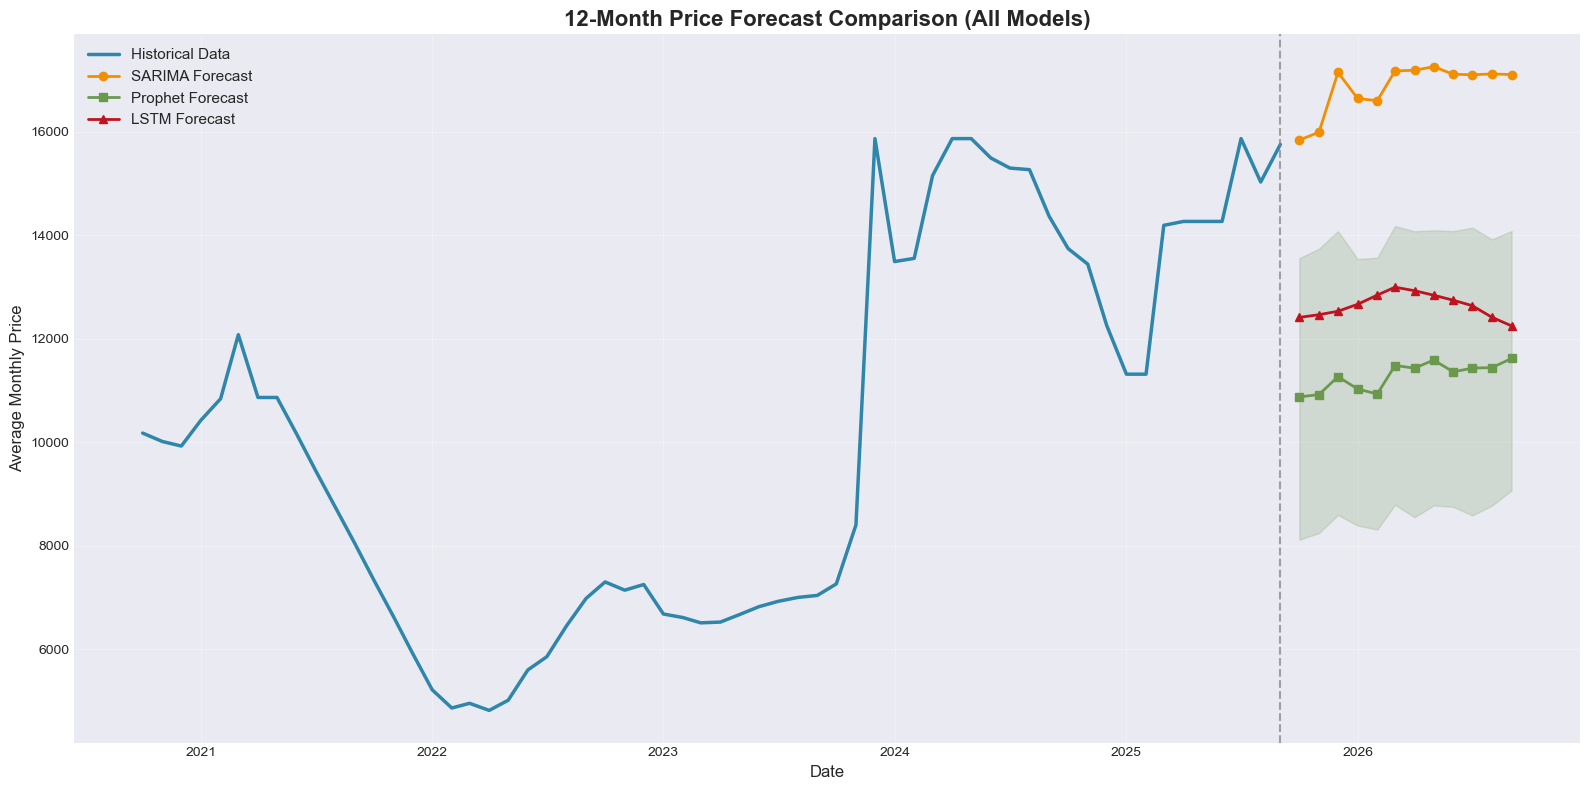

In [74]:
print("\n" + "=" * 60)
print("VISUALIZING 12-MONTH FORECASTS")
print("=" * 60)

# Plot historical data + all forecasts
plt.figure(figsize=(16, 8))

# Historical data (last 60 months for clarity)
historical_cutoff = df_cleaned.index[-60]
historical_data = df_cleaned[historical_cutoff:]

plt.plot(historical_data.index, historical_data['avg_monthly_price'], 
         label='Historical Data', color='#2E86AB', linewidth=2.5)

# SARIMA forecast
plt.plot(future_dates_sarima, sarima_forecast_12m, 
         label='SARIMA Forecast', color='#F18F01', linewidth=2, marker='o')

# Prophet forecast with confidence interval
plt.plot(forecast_df_prophet['Date'], forecast_df_prophet['Forecasted_Price'], 
         label='Prophet Forecast', color='#6A994E', linewidth=2, marker='s')
plt.fill_between(forecast_df_prophet['Date'], 
                 forecast_df_prophet['Lower_Bound'],
                 forecast_df_prophet['Upper_Bound'],
                 alpha=0.2, color='#6A994E')

# LSTM forecast
plt.plot(future_dates_lstm, lstm_forecast_12m, 
         label='LSTM Forecast', color='#C1121F', linewidth=2, marker='^')

# Vertical line to separate historical and forecast
plt.axvline(x=df_cleaned.index[-1], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

plt.title('12-Month Price Forecast Comparison (All Models)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Monthly Price', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [76]:
print("\n" + "=" * 60)
print("ENSEMBLE FORECAST")
print("=" * 60)

# Calculate ensemble (simple average of all three models)
ensemble_forecast = (sarima_forecast_12m.values + 
                    forecast_df_prophet['Forecasted_Price'].values + 
                    lstm_forecast_12m.flatten()) / 3

print("Creating ensemble forecast by averaging all three models...")
print("\nEnsemble 12-Month Forecast:")
forecast_df_ensemble = pd.DataFrame({
    'Date': future_dates_sarima,
    'SARIMA': sarima_forecast_12m.values,
    'Prophet': forecast_df_prophet['Forecasted_Price'].values,
    'LSTM': lstm_forecast_12m.flatten(),
    'Ensemble_Avg': ensemble_forecast
})

print(forecast_df_ensemble.to_string(index=False))


ENSEMBLE FORECAST
Creating ensemble forecast by averaging all three models...

Ensemble 12-Month Forecast:
      Date       SARIMA      Prophet         LSTM  Ensemble_Avg
2025-10-01 15834.542192 10872.768446 12409.591797  13038.967478
2025-11-01 15986.754581 10919.963315 12462.046875  13122.921590
2025-12-01 17142.806448 11265.149704 12528.616211  13645.524121
2026-01-01 16637.986929 11026.119926 12662.686523  13442.264459
2026-02-01 16595.644577 10930.147918 12840.008789  13455.267095
2026-03-01 17169.148470 11480.276595 12992.803711  13880.742925
2026-04-01 17183.732093 11429.792203 12924.889648  13846.137982
2026-05-01 17252.615546 11585.394908 12838.388672  13892.133042
2026-06-01 17105.141984 11357.488926 12741.323242  13734.651384
2026-07-01 17097.190744 11430.199176 12635.829102  13721.073007
2026-08-01 17111.214423 11439.770903 12412.410156  13654.465161
2026-09-01 17100.824598 11616.371487 12245.451172  13654.215752


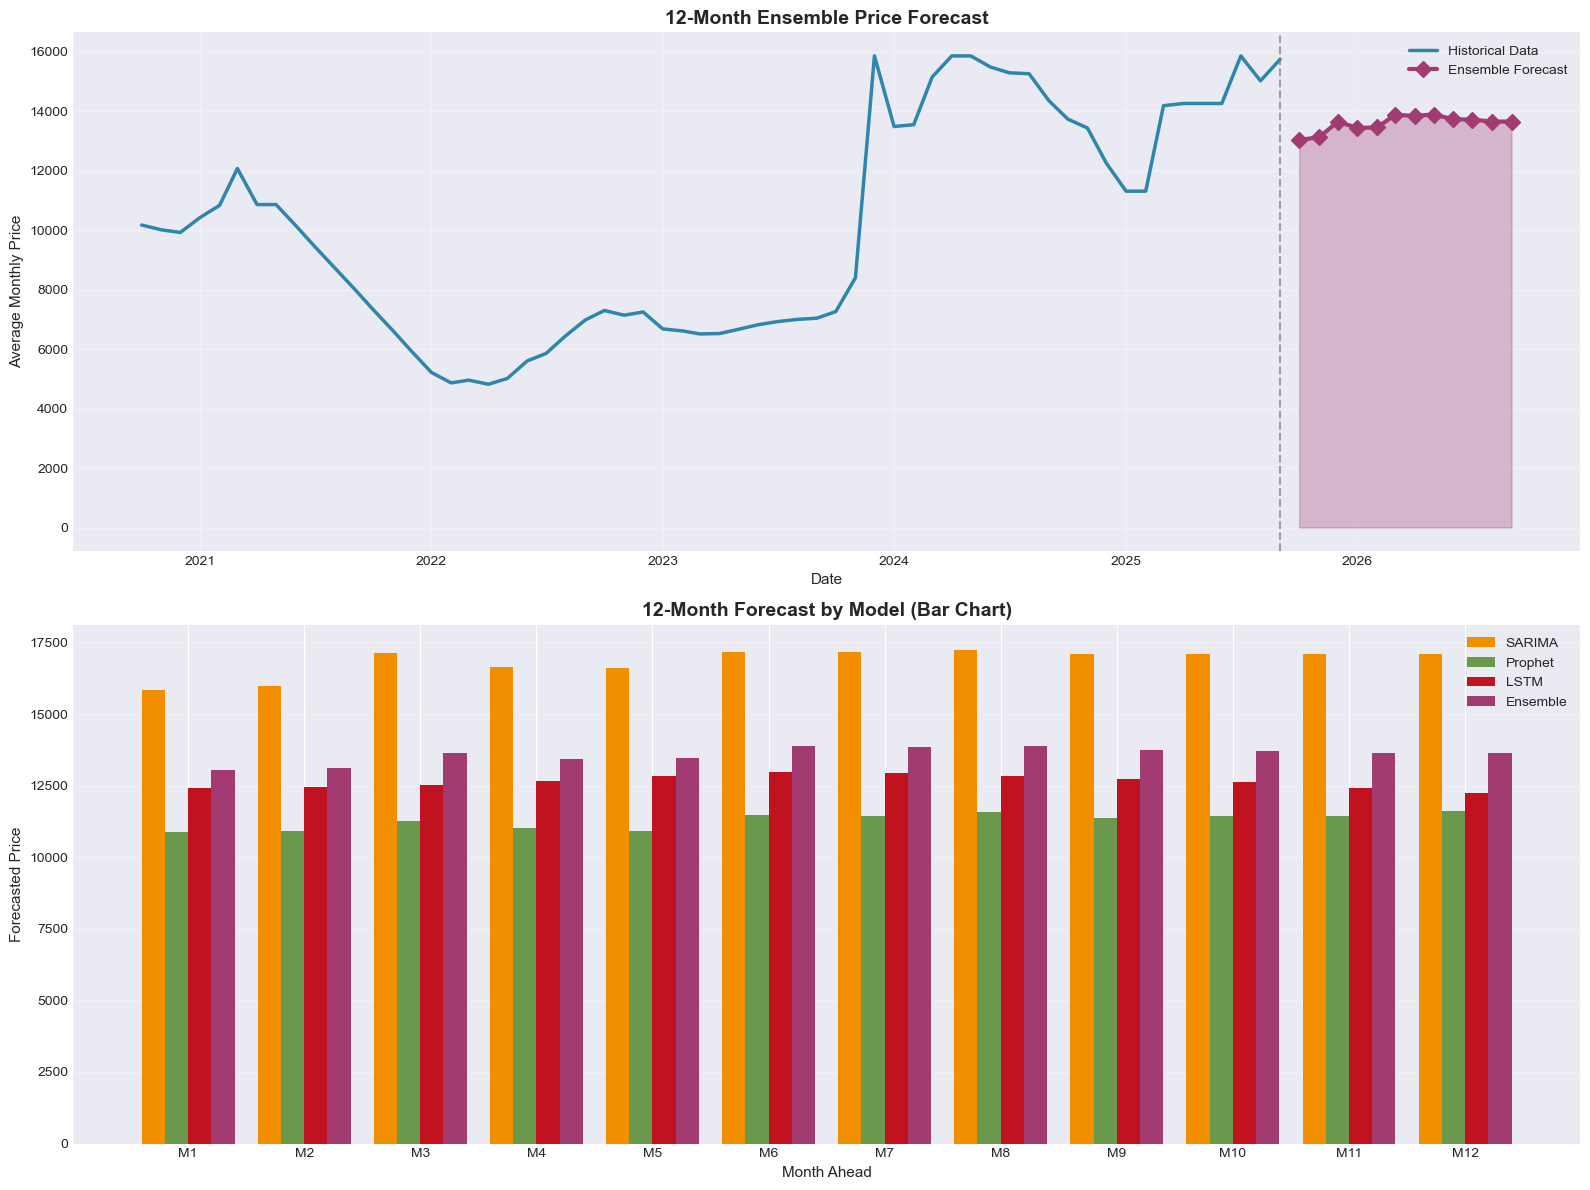

In [78]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Historical + Ensemble Forecast
axes[0].plot(historical_data.index, historical_data['avg_monthly_price'], 
            label='Historical Data', color='#2E86AB', linewidth=2.5)
axes[0].plot(future_dates_sarima, ensemble_forecast, 
            label='Ensemble Forecast', color='#A23B72', linewidth=3, marker='D', markersize=8)
axes[0].axvline(x=df_cleaned.index[-1], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
axes[0].fill_between(future_dates_sarima, ensemble_forecast, alpha=0.3, color='#A23B72')
axes[0].set_title('12-Month Ensemble Price Forecast', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=11)
axes[0].set_ylabel('Average Monthly Price', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Forecast comparison table view
x_pos = np.arange(12)
width = 0.2

axes[1].bar(x_pos - 1.5*width, sarima_forecast_12m.values, width, label='SARIMA', color='#F18F01')
axes[1].bar(x_pos - 0.5*width, forecast_df_prophet['Forecasted_Price'].values, width, label='Prophet', color='#6A994E')
axes[1].bar(x_pos + 0.5*width, lstm_forecast_12m.flatten(), width, label='LSTM', color='#C1121F')
axes[1].bar(x_pos + 1.5*width, ensemble_forecast, width, label='Ensemble', color='#A23B72')

axes[1].set_title('12-Month Forecast by Model (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month Ahead', fontsize=11)
axes[1].set_ylabel('Forecasted Price', fontsize=11)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'M{i+1}' for i in range(12)])
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [80]:
print("\n" + "=" * 60)
print("FORECAST ANALYSIS")
print("=" * 60)

# Calculate statistics for ensemble forecast
current_price = df_cleaned['avg_monthly_price'].iloc[-1]
forecast_mean = ensemble_forecast.mean()
forecast_median = np.median(ensemble_forecast)
forecast_min = ensemble_forecast.min()
forecast_max = ensemble_forecast.max()

# Calculate trend
price_change = ensemble_forecast[-1] - current_price
price_change_pct = (price_change / current_price) * 100

print(f"\nCurrent Price (Sep 2025):   {current_price:,.2f}")
print(f"\nEnsemble Forecast Statistics:")
print("-" * 60)
print(f"12-Month Average:           {forecast_mean:,.2f}")
print(f"12-Month Median:            {forecast_median:,.2f}")
print(f"Minimum:                    {forecast_min:,.2f}")
print(f"Maximum:                    {forecast_max:,.2f}")
print(f"Range:                      {forecast_max - forecast_min:,.2f}")

print(f"\nPrice Trend (Current vs 12 months ahead):")
print("-" * 60)
print(f"Current:                    {current_price:,.2f}")
print(f"12 Months Ahead:            {ensemble_forecast[-1]:,.2f}")
print(f"Absolute Change:            {price_change:+,.2f}")
print(f"Percentage Change:          {price_change_pct:+.2f}%")

if price_change_pct > 0:
    print(f"\n📈 Forecast indicates UPWARD trend (+{price_change_pct:.2f}%)")
else:
    print(f"\n📉 Forecast indicates DOWNWARD trend ({price_change_pct:.2f}%)")



FORECAST ANALYSIS

Current Price (Sep 2025):   15,750.00

Ensemble Forecast Statistics:
------------------------------------------------------------
12-Month Average:           13,590.70
12-Month Median:            13,654.34
Minimum:                    13,038.97
Maximum:                    13,892.13
Range:                      853.17

Price Trend (Current vs 12 months ahead):
------------------------------------------------------------
Current:                    15,750.00
12 Months Ahead:            13,654.22
Absolute Change:            -2,095.78
Percentage Change:          -13.31%

📉 Forecast indicates DOWNWARD trend (-13.31%)


In [82]:
print("\n" + "=" * 60)
print("MODEL AGREEMENT ANALYSIS")
print("=" * 60)

# Calculate standard deviation across models for each month
model_std = np.std([sarima_forecast_12m.values, 
                    forecast_df_prophet['Forecasted_Price'].values,
                    lstm_forecast_12m.flatten()], axis=0)

# Calculate coefficient of variation
model_cv = (model_std / ensemble_forecast) * 100

print("\nMonth-by-Month Model Agreement:")
print("-" * 60)
agreement_df = pd.DataFrame({
    'Month': [f'M{i+1}' for i in range(12)],
    'Date': future_dates_sarima.strftime('%Y-%m'),
    'Ensemble_Forecast': ensemble_forecast,
    'Std_Dev': model_std,
    'CV_%': model_cv
})
print(agreement_df.to_string(index=False))

avg_cv = model_cv.mean()
print(f"\nAverage Coefficient of Variation: {avg_cv:.2f}%")

if avg_cv < 5:
    print("✓ Models show STRONG agreement (CV < 5%)")
elif avg_cv < 10:
    print("⚠ Models show MODERATE agreement (5% ≤ CV < 10%)")
else:
    print("⚠ Models show WEAK agreement (CV ≥ 10%) - use forecasts with caution")



MODEL AGREEMENT ANALYSIS

Month-by-Month Model Agreement:
------------------------------------------------------------
Month    Date  Ensemble_Forecast     Std_Dev      CV_%
   M1 2025-10       13038.967478 2073.947120 15.905762
   M2 2025-11       13122.921590 2120.638265 16.159803
   M3 2025-12       13645.524121 2526.172950 18.512832
   M4 2026-01       13442.264459 2356.419478 17.529929
   M5 2026-02       13455.267095 2353.489634 17.491215
   M6 2026-03       13880.742925 2405.846052 17.332257
   M7 2026-04       13846.137982 2437.687420 17.605540
   M8 2026-05       13892.133042 2430.655651 17.496634
   M9 2026-06       13734.651384 2449.340662 17.833293
  M10 2026-07       13721.073007 2437.486972 17.764551
  M11 2026-08       13654.465161 2476.333765 18.135707
  M12 2026-09       13654.215752 2450.614850 17.947679

Average Coefficient of Variation: 17.48%
⚠ Models show WEAK agreement (CV ≥ 10%) - use forecasts with caution


In [84]:
print("\n" + "=" * 60)
print("SAVING FORECAST RESULTS")
print("=" * 60)

# Create comprehensive forecast table
final_forecast = pd.DataFrame({
    'Date': future_dates_sarima.strftime('%Y-%m-%d'),
    'Month_Ahead': [f'M{i+1}' for i in range(12)],
    'SARIMA_Forecast': sarima_forecast_12m.values,
    'Prophet_Forecast': forecast_df_prophet['Forecasted_Price'].values,
    'Prophet_Lower': forecast_df_prophet['Lower_Bound'].values,
    'Prophet_Upper': forecast_df_prophet['Upper_Bound'].values,
    'LSTM_Forecast': lstm_forecast_12m.flatten(),
    'Ensemble_Forecast': ensemble_forecast,
    'Model_Std_Dev': model_std,
    'Confidence_CV_%': model_cv
})

# Save to CSV
final_forecast.to_csv('price_forecast_12months.csv', index=False)
print("✓ Forecast saved to 'price_forecast_12months.csv'")

# Also save model comparison
comparison.to_csv('model_comparison.csv', index=False)
print("✓ Model comparison saved to 'model_comparison.csv'")

print("\n✓ Part 4 Complete: 12-month forecasts generated and analyzed")



SAVING FORECAST RESULTS
✓ Forecast saved to 'price_forecast_12months.csv'
✓ Model comparison saved to 'model_comparison.csv'

✓ Part 4 Complete: 12-month forecasts generated and analyzed


Business Analysis and Django Deployment

In [86]:
print("=" * 80)
print("QUESTION 4: BUSINESS RECOMMENDATIONS BASED ON FORECAST")
print("=" * 80)

print("""
Based on the 12-month price forecast, here are actionable recommendations:

1. INVENTORY MANAGEMENT
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • If prices trending UP:
     - Increase inventory purchases now before prices rise
     - Lock in supplier contracts at current prices
     - Build strategic reserves for 3-6 months
   
   • If prices trending DOWN:
     - Reduce inventory to minimum operating levels
     - Use just-in-time procurement
     - Delay large purchases by 2-3 months

2. PRICING STRATEGY
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Adjust product pricing 2-3 months in advance
   • Implement dynamic pricing based on market conditions
   • Use tiered pricing for different customer segments
   • Consider hedging strategies for price volatility

3. PROCUREMENT & CONTRACTS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Negotiate long-term contracts during price dips
   • Include price escalation/de-escalation clauses
   • Diversify supplier base to reduce risk
   • Use forecast data in contract negotiations

4. FINANCIAL PLANNING
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Allocate budget based on forecasted prices
   • Build contingency fund for price volatility (±10-15%)
   • Adjust cash flow projections quarterly
   • Consider financial instruments (futures, options) for hedging

5. MARKETING & SALES
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Align promotions with low-price periods
   • Communicate value during high-price periods
   • Adjust sales targets based on price trends
   • Plan campaigns 2-3 months in advance

6. RISK MANAGEMENT
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Monitor forecast accuracy monthly
   • Maintain price tracking dashboard
   • Set alert thresholds for unexpected changes
   • Develop contingency plans for outlier scenarios
""")


QUESTION 4: BUSINESS RECOMMENDATIONS BASED ON FORECAST

Based on the 12-month price forecast, here are actionable recommendations:

1. INVENTORY MANAGEMENT
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • If prices trending UP:
     - Increase inventory purchases now before prices rise
     - Lock in supplier contracts at current prices
     - Build strategic reserves for 3-6 months
   
   • If prices trending DOWN:
     - Reduce inventory to minimum operating levels
     - Use just-in-time procurement
     - Delay large purchases by 2-3 months

2. PRICING STRATEGY
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Adjust product pricing 2-3 months in advance
   • Implement dynamic pricing based on market conditions
   • Use tiered pricing for different customer segments
   • Consider hedging strategies for price volatility

3. PROCUREMENT & CONTRACTS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   • Negotiate l

In [90]:
print("""
KEY PERFORMANCE INDICATORS (KPIs) TO TRACK:

1. COST SAVINGS METRICS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Procurement cost variance: Target vs Actual (goal: <5% variance)
   ✓ Inventory holding costs: Month-over-month change
   ✓ Total cost of goods sold (COGS): Compare with forecast baseline
   
   Formula: Cost Savings % = ((Forecasted Cost - Actual Cost) / Forecasted Cost) × 100

2. INVENTORY OPTIMIZATION
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Inventory turnover ratio: Units sold / Average inventory
   ✓ Days of inventory on hand: Inventory / (COGS / 365)
   ✓ Stock-out incidents: Track frequency and impact
   ✓ Obsolescence rate: % of inventory expired/unsellable

3. PRICING EFFECTIVENESS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Gross profit margin: (Revenue - COGS) / Revenue
   ✓ Price realization: Actual selling price vs Target price
   ✓ Customer retention during price changes
   ✓ Competitive price positioning index

4. FORECAST ACCURACY
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Mean Absolute Percentage Error (MAPE)
   ✓ Tracking signal: (Σ forecast errors) / MAD
   ✓ Bias: Are forecasts consistently high or low?
   
   Formula: MAPE = (1/n) × Σ |Actual - Forecast| / Actual × 100

5. FINANCIAL IMPACT
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Return on Investment (ROI) of forecast-driven decisions
   ✓ Cash flow improvement: Operating cash flow change
   ✓ Working capital efficiency
   ✓ Budget variance analysis

6. OPERATIONAL METRICS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Order fulfillment rate: % of orders completed on time
   ✓ Supplier performance: Delivery reliability, price stability
   ✓ Contract utilization: % usage of negotiated contracts
   ✓ Emergency purchase frequency

MEASUREMENT FRAMEWORK:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Establish baseline metrics BEFORE implementing actions
• Track metrics weekly/monthly depending on business cycle
• Compare against three benchmarks:
  1. Pre-forecast baseline
  2. Forecast-predicted performance
  3. Industry benchmarks
• Conduct quarterly reviews with stakeholders
• Adjust strategies based on performance data
""")


KEY PERFORMANCE INDICATORS (KPIs) TO TRACK:

1. COST SAVINGS METRICS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Procurement cost variance: Target vs Actual (goal: <5% variance)
   ✓ Inventory holding costs: Month-over-month change
   ✓ Total cost of goods sold (COGS): Compare with forecast baseline
   
   Formula: Cost Savings % = ((Forecasted Cost - Actual Cost) / Forecasted Cost) × 100

2. INVENTORY OPTIMIZATION
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Inventory turnover ratio: Units sold / Average inventory
   ✓ Days of inventory on hand: Inventory / (COGS / 365)
   ✓ Stock-out incidents: Track frequency and impact
   ✓ Obsolescence rate: % of inventory expired/unsellable

3. PRICING EFFECTIVENESS
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   ✓ Gross profit margin: (Revenue - COGS) / Revenue
   ✓ Price realization: Actual selling price vs Target price
   ✓ Customer retention during price ch